In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from functools import partial
import matplotlib.pyplot as plt
from commplax import util
from src import gdbp_base as gb, dataloader as dl, plot as gplt

In [2]:
ds_train, ds_test = dl.loaddata(1, 0, 4, 2), dl.loaddata(2, 0, 4, 1)

In [5]:
def init_models(data, hparams, mode='train'):
  model_conf = {'mode': mode,
                'dtaps': hparams['dtaps'],
                'ntaps': hparams['ntaps'],
                'init_fn': gb.fdbp_init(data.a, steps=3, xi=hparams['xi'])}
  model_init = partial(gb.model_init, data, model_conf)
  fdbp = model_init([('fdbp_0',)])
  edbp = model_init([('fdbp_0', r'DConv_\d')])
  gdbp = model_init([])
  return fdbp, edbp, gdbp


def sweep_hparams(hparams, use_pretrained_params=False, save_params=False):
  Q = []
  for i, hp in enumerate(tqdm(hparams, desc='sweeping hparams')):  # iterate hparams
    models_train = init_models(ds_train, hp)
    models_test = init_models(ds_test, hp, mode='test')
    
    q = []
    for j, (model_train, model_test) in enumerate(tqdm(zip(models_train, models_test), total=3, desc='applying model', leave=False)):  # iterate models
      
      params_file = 'pretrained/snr_vs_dtaps_ntaps/params_%d_%d' % (i, j)
      if use_pretrained_params:
        params = util.load_variable(params_file)
      else:
        params_queue = [None] * 3
        for _, p, _ in gb.train(model_train, ds_train, n_iter=2000):
          params_queue.append(p)
          params = params_queue.pop(0)
        if save_params:
          util.save_variable(params, params_file)
        
      q.append(gb.test(model_test, params, ds_test)[0].QSq.total)
    Q.append(q)
  Q = np.stack(Q)
  return Q

In [4]:
# make sweeping grid

NTAPS = np.arange(1, 41, 6)
DTAPS = np.arange(181, 261, 12)
OPTXI = pd.read_csv('source_data/fdbp_opt_xi_ntaps.csv').values[:, 0]  # read optimal xi given dtaps

hparams = []
for ntaps, xi in zip(NTAPS, OPTXI):
  for dtaps in DTAPS:
    hparams.append({'ntaps': ntaps, 'dtaps': dtaps, 'xi': xi})

In [6]:
# # load precomputed results
# results = pd.read_csv('source_data/snr_dtaps_ntaps.csv')
# grp_res = results.groupby('model')
# res_fdbp = grp_res.get_group('FDBP')
# res_edbp = grp_res.get_group('EDBP')
# res_gdbp = grp_res.get_group('GDBP')

Q = sweep_hparams(hparams, use_pretrained_params=False, save_params=True)

res_fdbp = pd.DataFrame(data=hparams)
res_edbp = pd.DataFrame(data=hparams)
res_gdbp = pd.DataFrame(data=hparams)
res_fdbp['Q'] = Q[:, 0]
res_fdbp['model'] = 'FDBP'
res_edbp['Q'] = Q[:, 1]
res_edbp['model'] = 'EDBP'
res_gdbp['Q'] = Q[:, 2]
res_gdbp['model'] = 'GDBP'

results = pd.concat([res_fdbp, res_edbp, res_gdbp])
results.to_csv('source_data/snr_dtaps_ntaps.csv', index=False)

sweeping hparams:   0%|          | 0/49 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

applying model:   0%|          | 0/3 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

training:   0%|          | 0/2000 [00:00<?, ?it/s]

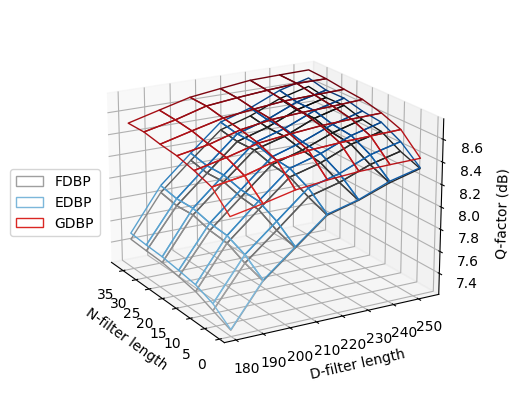

In [8]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(5, 5), dpi=100)
ax.view_init(19, -30)
curves = 20

colors = plt.cm.RdPu_r(np.linspace(0., 0.5, 3))[::-1]

df = res_fdbp.pivot('dtaps', 'ntaps', 'Q')
(X, Y), Z = np.meshgrid(df.columns.values, df.index.values), df.values
gplt.wireframe_cmap(ax, X, Y, Z, cmap=plt.cm.Greys, offset=[-1.2, 0], label='FDBP')

df = res_edbp.pivot('dtaps', 'ntaps', 'Q')
(X, Y), Z = np.meshgrid(df.columns.values, df.index.values), df.values
gplt.wireframe_cmap(ax, X, Y, Z, cmap=plt.cm.Blues, offset=[-1.2, 0], label='EDBP')

df = res_gdbp.pivot('dtaps', 'ntaps', 'Q')
(X, Y), Z = np.meshgrid(df.columns.values, df.index.values), df.values
gplt.wireframe_cmap(ax, X, Y, Z, cmap=plt.cm.Reds, offset=[-1.2, 0], label='GDBP')

ax.set_xlabel('N-filter length')
ax.set_ylabel('D-filter length')
ax.set_zlabel('Q-factor (dB)')
ax.invert_xaxis()
ax.legend(loc=(-0.18, 0.4))

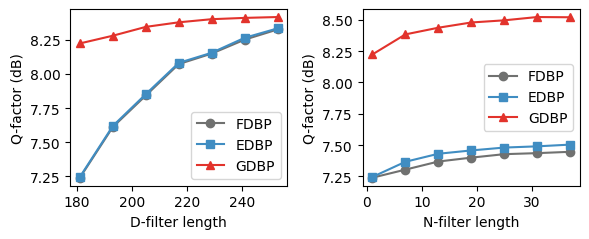

In [9]:
def plot_snr_dtaps_on_ntaps(res, ntaps, *args, ax=None, **kwargs):
  if ax is None:
    ax = plt.subplots(figsize=(4, 2), dpi=100)[1]
  res = res.groupby('ntaps').get_group(ntaps)
  ax.plot(res.dtaps, res.Q, *args, **kwargs)
  
  
def plot_snr_ntaps_on_dtaps(res, dtaps, *args, ax=None,  **kwargs):
  if ax is None:
    ax = plt.subplots(figsize=(4, 2), dpi=100)[1]
    
  res = res.groupby('dtaps').get_group(dtaps)
  ax.plot(res.ntaps, res.Q, *args, **kwargs)

  
axes = plt.subplots(1, 2, figsize=(6, 2.5), dpi=100)[1]
ax = axes[0]
plot_snr_dtaps_on_ntaps(res_fdbp, 1, '-o', ax=ax, label='FDBP', color='#707170')
plot_snr_dtaps_on_ntaps(res_edbp, 1, '-s', ax=ax, label='EDBP', color='#408DC2')
plot_snr_dtaps_on_ntaps(res_gdbp, 1, '-^', ax=ax, label='GDBP', color='#E2332C')
ax.set_xlabel('D-filter length')
ax.set_ylabel('Q-factor (dB)')
ax.legend()
# ax.text(-.2, 1.1, '(a)', transform=ax.transAxes, ha='center')

ax = axes[1]
plot_snr_ntaps_on_dtaps(res_fdbp, 181, '-o', ax=ax, label='FDBP', color='#707170')
plot_snr_ntaps_on_dtaps(res_edbp, 181, '-s', ax=ax, label='EDBP', color='#408DC2')
plot_snr_ntaps_on_dtaps(res_gdbp, 181, '-^', ax=ax, label='GDBP', color='#E2332C')
ax.set_xlabel('N-filter length')
ax.set_ylabel('Q-factor (dB)')
ax.legend()
# ax.text(-.2, 1.1, '(b)', transform=ax.transAxes, ha='center')
plt.tight_layout()